# Question 1: It is a common practice in machine learning to create synthetic data with well-understood properties to investigate the behavior of an algorithm. Please create your own dataset (at least 10 examples) that is linearly separable. Now train a perceptron model. Provide evidence that your perceptron found a decision boundary. Finally, measure the accuracy of your model on the training set and comment on the result.

### Below we have my implementation of the perceptron model

In [74]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
 
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        # Convert to binary output
        return (np.asarray(x) >= 0).astype(int)


#### Here is my sample linearly separable dataset which I train my perceptron model on

In [75]:
X = np.array([
    [ 2.0,  1.5],
    [ 2.2,  2.1],
    [ 1.8,  2.5],
    [ 2.5,  1.8],
    [ 3.0,  2.2],
    [-2.0, -1.5],
    [-2.2, -2.1],
    [-1.8, -2.5],
    [-2.5, -1.8],
    [-3.0, -2.2]
])

y = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Initialize and train the perceptron
p = Perceptron(learning_rate=0.1, n_iterations=200)
p.fit(X, y)
print("Weights:", p.weights)
print("Bias:", p.bias)

Weights: [0.2  0.15]
Bias: -0.1


#### Here is some matplot code to plot the decision boundary as evidence. You can see that the model successfully found a decision boundary, which we would expect because the data was linearly separable        

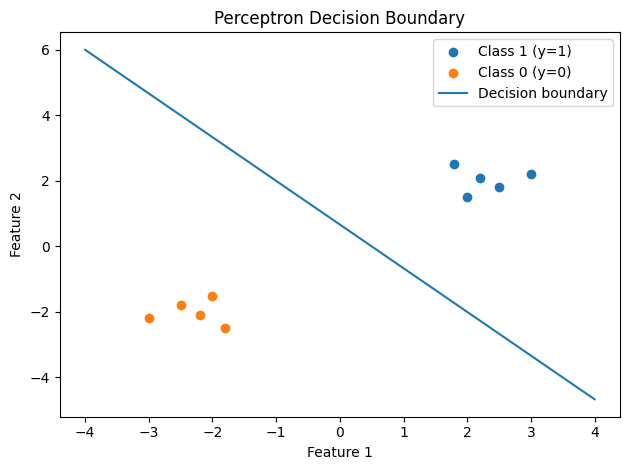

In [76]:
import matplotlib.pyplot as plt

plt.figure()
# Plot data points
plt.scatter(X[y==1,0], X[y==1,1], label="Class 1 (y=1)")
plt.scatter(X[y==0,0], X[y==0,1], label="Class 0 (y=0)")

# Calculate and plot decision boundary
w1, w2 = p.weights
b = p.bias

# Handle the case where w2 is zero to avoid division by zero
x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
if abs(w2) > 1e-12:
    x2_vals = -(w1/w2) * x1_vals - b / w2
    plt.plot(x1_vals, x2_vals, label="Decision boundary")
# If w2 is zero, the decision boundary is vertical
else:
    x_val = -b / w1 if abs(w1) > 1e-12 else 0.0
    plt.axvline(x=x_val, label="Decision boundary")

plt.title(f"Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()


In [77]:
# Code to evaluate the model
y_pred = p.predict(X)
accuracy = (y_pred == y).mean()
print(f"Training accuracy: {accuracy:.2f}")

Training accuracy: 1.00


The perceptron reaches 100% accuracy on my example training set. This makes sense because the dataset is linearly separable. The decision boundary shown in the plot above shows a separation between the positive and negative samples meaning the perceptron successfully learned a separating line or hyperplane.

# Question 2: Create your own small dataset (at least 10 examples) that is not linearly seperable. Now train a perceptron model. Did the algorithm converge? Provide evidence. Now measure the accuracy of your model on the training set and comment on the result.

In [78]:
X_NOT_SEPARABLE = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [0.5, 0.2],
    [0.2, 0.8],
    [0.8, 0.2],
    [0.8, 0.9],
    [0.3, 0.4],
    [0.6, 0.7],
    [0.5, 0],
    [0, 0.5],
    [0.65, 0.2]
])

y_not_separable = np.array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

# Initialize and train the perceptron on non-linearly separable data
p_not_separable = Perceptron(learning_rate=0.1, n_iterations=500) # Sufficient iterations to observe non-convergence
p_not_separable.fit(X_NOT_SEPARABLE, y_not_separable)
print("Weights:", p_not_separable.weights)
print("Bias:", p_not_separable.bias)

Weights: [-0.115 -0.17 ]
Bias: 0.0


To check if the algorithm converged we can do the same plotting we did above, just on the newly trained model.

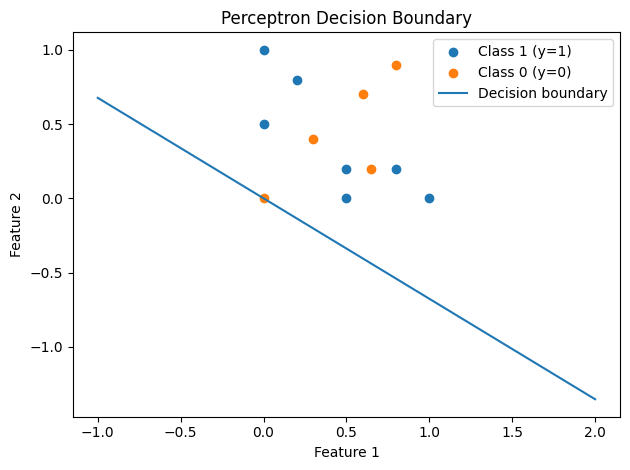

In [79]:
plt.figure()
# Plot data points
plt.scatter(X_NOT_SEPARABLE[y_not_separable==1,0], X_NOT_SEPARABLE[y_not_separable==1,1], label="Class 1 (y=1)")
plt.scatter(X_NOT_SEPARABLE[y_not_separable==0,0], X_NOT_SEPARABLE[y_not_separable==0,1], label="Class 0 (y=0)")

# Calculate and plot decision boundary
w1, w2 = p_not_separable.weights
b = p_not_separable.bias

# Handle the case where w2 is zero to avoid division by zero
x1_vals = np.linspace(X_NOT_SEPARABLE[:,0].min()-1, X_NOT_SEPARABLE[:,0].max()+1, 200)
if abs(w2) > 1e-12:
    x2_vals = -(w1/w2) * x1_vals - b / w2
    plt.plot(x1_vals, x2_vals, label="Decision boundary")
# If w2 is zero, the decision boundary is vertical
else:
    x_val = -b / w1 if abs(w1) > 1e-12 else 0.0
    plt.axvline(x=x_val, label="Decision boundary")

plt.title(f"Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()

As we can see from the plot above; The model failed pretty miserably, which was expected because perceptron won't converge with non-linearly separable data. Basically all of the points show are above the decision boundary line, meaning that there would be a large number of points misclassified. 

Now let us check the accuracy for this model

In [80]:
# Code to evaluate the model
y_pred_not_separable = p_not_separable.predict(X_NOT_SEPARABLE)
accuracy_not_separable = (y_pred_not_separable == y_not_separable).mean()
print(f"Training accuracy: {accuracy_not_separable:.2f}")

Training accuracy: 0.33


The training accuracy for my model is 33%. This result makes sense, since the dataset is not linearly separable (similar to the XOR problem). This is the problem with the perceptron algorithm as it can only converge when a linear separation exists.

# Question 3: Download the Titanic dataset and randomly split it into training (70%) and test (30%) sets. Train an adaline model using the training data. Evaluate it on (a) training data; (b) test data. Is there a difference in performance? Please report your performance and explain the difference.

In [81]:
import numpy as np  

# Implementation of adaptive linear neuron (Adaline) classifier from the textbook
class Adaline(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [82]:
# Lets preprocess the Titanic dataset and then split it into training and test sets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/train.csv')

df = df.drop(columns=["Name", "Ticket", "Cabin"])  
df = df.dropna()

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Split into features and labels
X = df.drop(columns=["Survived"]).values
y = df["Survived"].values

# Adaline expects labels as -1 and 1 instead of 0 and 1
y = np.where(y == 0, -1, 1)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=35, shuffle=True, stratify=y
)

In [83]:
# Initialize and train Adaline
adaline = Adaline(eta=0.0001, n_iter=100)
adaline.fit(X_train, y_train)

# Training progress
print("Final weights:", adaline.w_)

# Predictions
y_pred_train = adaline.predict(X_train)
y_pred_test = adaline.predict(X_test)

train_accuracy = (y_pred_train == y_train).mean()
test_accuracy = (y_pred_test == y_test).mean()

print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Test accuracy: {test_accuracy:.2f}")


Final weights: [-0.17563809  0.04337207 -0.30161104  0.4577022  -0.15130335 -0.11123017
 -0.06059016  0.04964173  0.04689583]
Training accuracy: 0.79
Test accuracy: 0.82


So above we have the trained Adaline model on the training data and then the evaluation on the training and test data. The model achieved 79% accuracy on the training set and 82% accuracy on the test set. This slightly higher test accuracy indicates that the model generalizes to unseen data and there wasn't any overfitting. I Imagine that the small difference is because of small difference between the data and not actually a performance problem between the data. 

Something funny that happened while I was making this was accidentally setting the learning rate to high (it was at `0.01`) and when I checked the models accuracy it was really bad (like 25%), and then I realized that it was not converging at all. 

# Question 4: What were the most predictive features of your Titanic model? Provide evidence.

In [84]:
# Print out the outputs with the features to see what is most predictive
feature_names = df.drop(columns=["Survived"]).columns
for name, weight in zip(feature_names, adaline.w_[1:]):  # skip bias term at index 0
    print(f"{name:11s} -> {weight:.3f}")



PassengerId -> 0.043
Pclass      -> -0.302
Sex         -> 0.458
Age         -> -0.151
SibSp       -> -0.111
Parch       -> -0.061
Fare        -> 0.050
Embarked    -> 0.047


The most predictive feature was Sex with a weight of `0.458`. This makes sense because we mapped female to 1 (`f -> 1`) meaning the model strongly associates being a female with survival. The second most predictive feature was Pclass or the passengers class with a weight of `-0.302`. This means that for higher values of this feature, such as Pclass of 3 or the lowest possible class (the worst class) would predict a lower chance of survival. The features that we're the least predictive we're PassangerId, Fare, and Embarked which makes sense because they likelt would have little effect on survival. Because the features were standardized we can compare weight magnitudes as a valid for or checking. 

# Question 5:  common approach for evaluating a machine learning model is to compare it to a baseline model, which usually uses simple heuristics and/or randomness. The purpose of this comparison is to ensure that the machine learning model is behaving in an ‘intelligent’ way (e.g. rather than merely guessing). Please create a baseline model and compare its performance to the performance of your perceptron and adaline models. One possibility here is to simply set the weights to random numbers and have the model generate predictions using these weights. 

In [ ]:
# Baseline model implementation with random weights
def random_weights_baseline(X):
    # Generate random weights
    w = np.random.randn(X.shape[1])
    b = np.random.randn()

    # Generate predictions
    linear_output = np.dot(X, w) + b
    y_pred = np.where(linear_output >= 0, 1, -1)
    return y_pred

### Now lets evaluate the baseline compared to the perceptron and the adaline model

In [73]:
# Baseline accuracy for perceptron 
y_pred_baseline_perceptron = random_weights_baseline(X)
baseline_accuracy_perceptron = (y_pred_baseline_perceptron == y).mean()

# Baseline accuracy for adaline
y_pred_baseline = random_weights_baseline(X_train)
baseline_accuracy = (y_pred_baseline == y_train).mean()

# Display findings
print(f"Baseline (random weights) accuracy for perceptron: {baseline_accuracy_perceptron:.2f}")
print(f"Perceptron accuracy for linearly separable data: {accuracy:.2f}")
print(f"Perceptron accuracy for non-linearly separable data: {accuracy_not_separable:.2f}")
print()
print(f"Baseline (random weights) accuracy for adaline: {baseline_accuracy:.2f}")
print(f"Adaline accuracy on training set: {train_accuracy:.2f}")


Baseline (random weights) accuracy for perceptron: 0.29
Perceptron accuracy for linearly separable data: 1.00
Perceptron accuracy for non-linearly separable data: 0.33

Baseline (random weights) accuracy for adaline: 0.55
Adaline accuracy on training set: 0.79


The random-weights baseline achieved an accuracy of 64% when testing on the sample linearly separable data in comparison, the Perceptron achieved 100% accuracy on the same dataset. The random-weights baseline model for the adaline dataset (or the titanic dataset) achieved an accuracy of around 50% which makes sense because randomly guessing on binary data would give you something around %50. In comparison, the Adaline model achieved 79% accuracy on the same dataset. This demonstrates that the learned models are outperforming naive guessing for both perceptron and adaline models. This provides evidence that they have found meaningful decision boundaries in the data.